# Data Analysis

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# pd.set_option("display.max_columns", None)
# pd.set_option("display.max_rows", None)
# pd.options.display.max_rows = 4000
# pd.options.display.max_columns = 4000
from sklearn.decomposition import PCA

## Loading Dataset

In [5]:
input_header = {"PROC_TRACEINFO" : "id",
                "OP070_V_1_angle_value": "angle_1",
                "OP090_SnapRingPeakForce_value" : "snap_ring_peak_force",
                "OP070_V_2_angle_value" : "angle_2",
                "OP120_Rodage_I_mesure_value" : "rodage_i",
                "OP090_SnapRingFinalStroke_value" : "snap_ring_final_stroke",
                "OP110_Vissage_M8_torque_value" : "vissage_m8_torque",
                "OP100_Capuchon_insertion_mesure" : "capuchon_insertion",
                "OP120_Rodage_U_mesure_value" : "rodage_u",
                "OP070_V_1_torque_value" : "torque_1",
                "OP090_StartLinePeakForce_value" : "start_line_peak_force",
                "OP110_Vissage_M8_angle_value" : "vissage_m8_angle",
                "OP090_SnapRingMidPointForce_val" : "snap_ring_midpoint_force",
                "OP070_V_2_torque_value" : "torque_2"}
output_header = {"PROC_TRACEINFO" : "id",
                 "Binar OP130_Resultat_Global_v" : "result"}

train_input = pd.read_csv("../data/train_inputs.csv", header=0).rename(columns=input_header)
train_output = pd.read_csv("../data/train_output.csv", header=0).rename(columns=output_header)

## Dataset Input

In [6]:
train_input

,id,angle_1,snap_ring_peak_force,angle_2,rodage_i,snap_ring_final_stroke,vissage_m8_torque,capuchon_insertion,rodage_u,torque_1,start_line_peak_force,vissage_m8_angle,snap_ring_midpoint_force,torque_2
0,I-B-XA1207672-190429-00688,180.4,190.51,173.1,113.64,12.04,12.16,NaN,11.97,6.62,26.37,18.8,109.62,6.60
1,I-B-XA1207672-190828-00973,138.7,147.70,163.5,109.77,12.12,12.19,0.39,11.97,6.41,21.03,18.5,105.48,6.40
2,I-B-XA1207672-190712-03462,180.9,150.87,181.2,109.79,11.86,12.24,NaN,11.97,6.62,25.81,17.5,100.03,6.61
3,I-B-XA1207672-190803-00051,173.5,159.56,151.8,113.25,11.82,12.35,0.39,11.97,6.62,24.62,15.6,104.94,6.61
4,I-B-XA1207672-190508-03248,174.5,172.29,177.5,112.88,12.07,12.19,NaN,11.97,6.62,29.22,33.6,99.19,6.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34510,I-B-XA1207672-190520-00031,158.2,168.40,180.6,110.65,11.88,12.23,NaN,11.98,6.61,24.03,14.8,98.76,6.61
34511,I-B-XA1207672-190906-00270,139.4,146.24,154.5,108.14,12.04,12.27,0.41,11.97,6.41,21.52,15.5,98.37,6.40
34512,I-B-XA1207672-190429-00930,165.5,157.34,149.8,112.77,12.09,12.17,NaN,11.97,6.62,22.65,24.4,92.92,6.62
34513,I-B-XA1207672-190424-02120,152.4,165.07,140.0,111.19,12.06,12.34,NaN,11.97,6.60,20.77,13.6,101.21,6.60


In [7]:
train_input.shape

(34515, 14)

In [8]:
train_input.describe()

,angle_1,snap_ring_peak_force,angle_2,rodage_i,snap_ring_final_stroke,vissage_m8_torque,capuchon_insertion,rodage_u,torque_1,start_line_peak_force,vissage_m8_angle,snap_ring_midpoint_force,torque_2
count,34515.000000,34515.000000,34515.000000,34515.000000,34515.000000,34515.000000,15888.000000,34515.000000,34515.000000,34515.000000,34515.000000,34515.000000,34515.000000
mean,159.906922,156.915055,159.618236,113.350222,11.970190,12.256785,0.388173,11.971027,6.548403,23.630152,17.878398,97.700978,6.550867
std,15.662650,11.271492,15.091490,3.528522,0.169873,0.065319,0.024425,0.003050,0.097602,2.546341,6.785079,6.837714,0.094814
min,101.800000,0.000000,82.000000,99.990000,0.000000,12.030000,0.240000,11.970000,5.670000,0.000000,6.300000,0.000000,5.740000
25%,148.700000,149.210000,149.400000,111.040000,11.850000,12.210000,0.380000,11.970000,6.410000,22.280000,13.500000,94.310000,6.420000
50%,158.000000,156.180000,158.700000,113.160000,12.040000,12.260000,0.390000,11.970000,6.610000,23.880000,16.400000,98.500000,6.610000
75%,169.300000,164.380000,168.900000,115.380000,12.080000,12.300000,0.410000,11.970000,6.620000,25.290000,20.200000,102.230000,6.610000
max,198.300000,196.920000,198.100000,177.950000,12.190000,12.500000,0.420000,11.990000,6.670000,43.410000,84.600000,127.300000,6.670000


array([[<AxesSubplot:title={'center':'angle_1'}>,
        <AxesSubplot:title={'center':'snap_ring_peak_force'}>,
        <AxesSubplot:title={'center':'angle_2'}>,
        <AxesSubplot:title={'center':'rodage_i'}>],
       [<AxesSubplot:title={'center':'snap_ring_final_stroke'}>,
        <AxesSubplot:title={'center':'vissage_m8_torque'}>,
        <AxesSubplot:title={'center':'capuchon_insertion'}>,
        <AxesSubplot:title={'center':'rodage_u'}>],
       [<AxesSubplot:title={'center':'torque_1'}>,
        <AxesSubplot:title={'center':'start_line_peak_force'}>,
        <AxesSubplot:title={'center':'vissage_m8_angle'}>,
        <AxesSubplot:title={'center':'snap_ring_midpoint_force'}>],
       [<AxesSubplot:title={'center':'torque_2'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

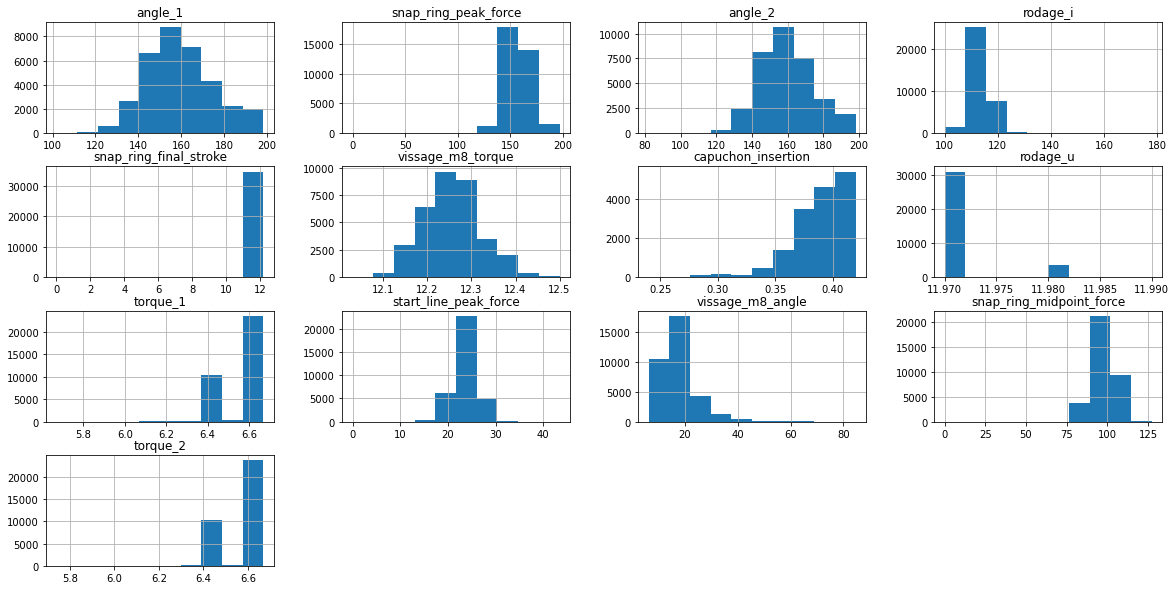

In [29]:
train_input.hist(figsize=(20,10))

In [10]:
train_input.isna().sum()

id                              0
angle_1                         0
snap_ring_peak_force            0
angle_2                         0
rodage_i                        0
snap_ring_final_stroke          0
vissage_m8_torque               0
capuchon_insertion          18627
rodage_u                        0
torque_1                        0
start_line_peak_force           0
vissage_m8_angle                0
snap_ring_midpoint_force        0
torque_2                        0
dtype: int64

**capuchon_insertion** might not be a relevent parameter, more than 50% of the population is na ($\frac{18627}{34515} \approx 0.53967840069$).  
But it nan values could also be filed with the average value as shown below...

In [11]:
mean = train_input["capuchon_insertion"].mean()
mean

0.3881728348438868

In [12]:
capuchon_insertion_no_nan = train_input["capuchon_insertion"].fillna(mean, inplace=False)
capuchon_insertion_no_nan

0        0.388173
1        0.390000
2        0.388173
3        0.390000
4        0.388173
           ...   
34510    0.388173
34511    0.410000
34512    0.388173
34513    0.388173
34514    0.388173
Name: capuchon_insertion, Length: 34515, dtype: float64

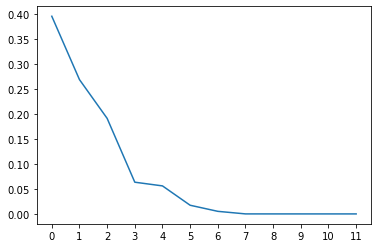

In [32]:
train_input_pca = train_input.copy() # Deep copy
train_input_pca = train_input_pca[train_input_pca.columns[~train_input_pca.columns.isin(["id", "capuchon_insertion"])]]
pca = PCA()
pca.fit(train_input_pca)
pca.explained_variance_ratio_
plt.xticks(range(12))
plt.plot(range(12), pca.explained_variance_ratio_)

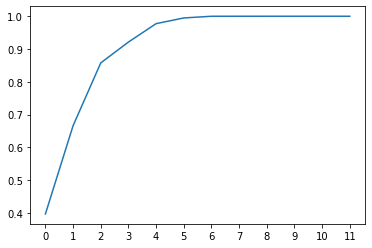

In [33]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.xticks(range(12))
plt.plot(range(12), cumsum)

## Dataset Output

In [10]:
train_output

,id,result
0,I-B-XA1207672-190429-00688,0
1,I-B-XA1207672-190828-00973,0
2,I-B-XA1207672-190712-03462,0
3,I-B-XA1207672-190803-00051,0
4,I-B-XA1207672-190508-03248,0
...,...,...
34510,I-B-XA1207672-190520-00031,0
34511,I-B-XA1207672-190906-00270,0
34512,I-B-XA1207672-190429-00930,0
34513,I-B-XA1207672-190424-02120,0


In [11]:
train_output_bool = train_output.copy() # Deep copy
train_output_bool["result"] = train_output_bool["result"].astype(bool)
train_output_bool

,id,result
0,I-B-XA1207672-190429-00688,False
1,I-B-XA1207672-190828-00973,False
2,I-B-XA1207672-190712-03462,False
3,I-B-XA1207672-190803-00051,False
4,I-B-XA1207672-190508-03248,False
...,...,...
34510,I-B-XA1207672-190520-00031,False
34511,I-B-XA1207672-190906-00270,False
34512,I-B-XA1207672-190429-00930,False
34513,I-B-XA1207672-190424-02120,False


In [12]:
train_output.shape

(34515, 2)

In [13]:
train_output["result"].value_counts()

0    34210
1      305
Name: result, dtype: int64

Unbalanced result classes. Defect class is under-represented in the population ($\frac{305}{34515} \approx 0.008836737650296972$).